In [185]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:

file_path_1 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/COMPUSTAT_ALL.csv' # Fundamental data
df1 = pd.read_csv(file_path_1)
df1['datadate'] = pd.to_datetime(df1['datadate'])
df1 = df1.sort_values(by=['tic', 'datadate'])

df1.info()

/var/folders/2f/bmcm36r135v_v27k0vz0w_dr0000gn/T/ipykernel_47964/554828581.py:2: DtypeWarning: Columns (10,17,26,650,657,668,669,679) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path_1)


<class 'pandas.core.frame.DataFrame'>
Index: 17770 entries, 1237 to 15084
Columns: 680 entries, gvkey to ipodate
dtypes: datetime64[ns](1), float64(622), int64(16), object(41)
memory usage: 92.3+ MB


In [187]:
file_path_2 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/RATIOS_FIRM_ALL.csv' # Financial ratios data
df2 = pd.read_csv(file_path_2)
df2['qdate'] = pd.to_datetime(df2['qdate'])
df2['public_date'] = pd.to_datetime(df2['public_date'])

# Sort by qdate and public_date to ensure the most recent public_date comes last
df2 = df2.sort_values(by=['qdate', 'public_date'])
# Drop duplicates to keep only the first public_date for each qdate
df2 = df2.drop_duplicates(subset=['qdate','TICKER'], keep='first')

In [188]:
df = pd.merge(df1, df2, left_on=['datadate', 'gvkey'], right_on=['qdate', 'gvkey'], how='inner')
# convert divyield to float
df['divyield'] = df['divyield'].replace('%', '', regex=True).astype(float)
df = df[['datadate', 'tic'] + df.select_dtypes(include='float').columns.tolist()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Columns: 695 entries, datadate to PEG_ltgforward
dtypes: datetime64[ns](1), float64(693), object(1)
memory usage: 81.1+ MB


In [189]:
# Drop columns with more than, say, 30% missing values
df = df.dropna(thresh=int(0.5 * len(df)), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Columns: 233 entries, datadate to PEG_ltgforward
dtypes: datetime64[ns](1), float64(231), object(1)
memory usage: 27.2+ MB


In [190]:
correlation_matrix = df.select_dtypes(include='float').corr()
print(correlation_matrix)

                   ajexq      ajpq  currtrq      scfq      srcq    acchgq  \
ajexq           1.000000  0.999886      NaN -0.076141 -0.003711  0.002376   
ajpq            0.999886  1.000000      NaN -0.076095 -0.003574  0.002375   
currtrq              NaN       NaN      NaN       NaN       NaN       NaN   
scfq           -0.076141 -0.076095      NaN  1.000000 -0.431651 -0.019662   
srcq           -0.003711 -0.003574      NaN -0.431651  1.000000 -0.036008   
...                  ...       ...      ...       ...       ...       ...   
ptb            -0.036459 -0.036566      NaN  0.098970 -0.143277  0.008368   
PEG_trailing    0.266238  0.266011      NaN -0.010789 -0.048570 -0.009830   
divyield       -0.043277 -0.042671      NaN -0.130243  0.190901 -0.010195   
PEG_1yrforward -0.017714 -0.017724      NaN  0.001399  0.006213 -0.004295   
PEG_ltgforward  0.048991  0.048981      NaN  0.024602 -0.034185 -0.000006   

                    acoq      actq      ancq       aoq  ...  sale_nwc  \
aj

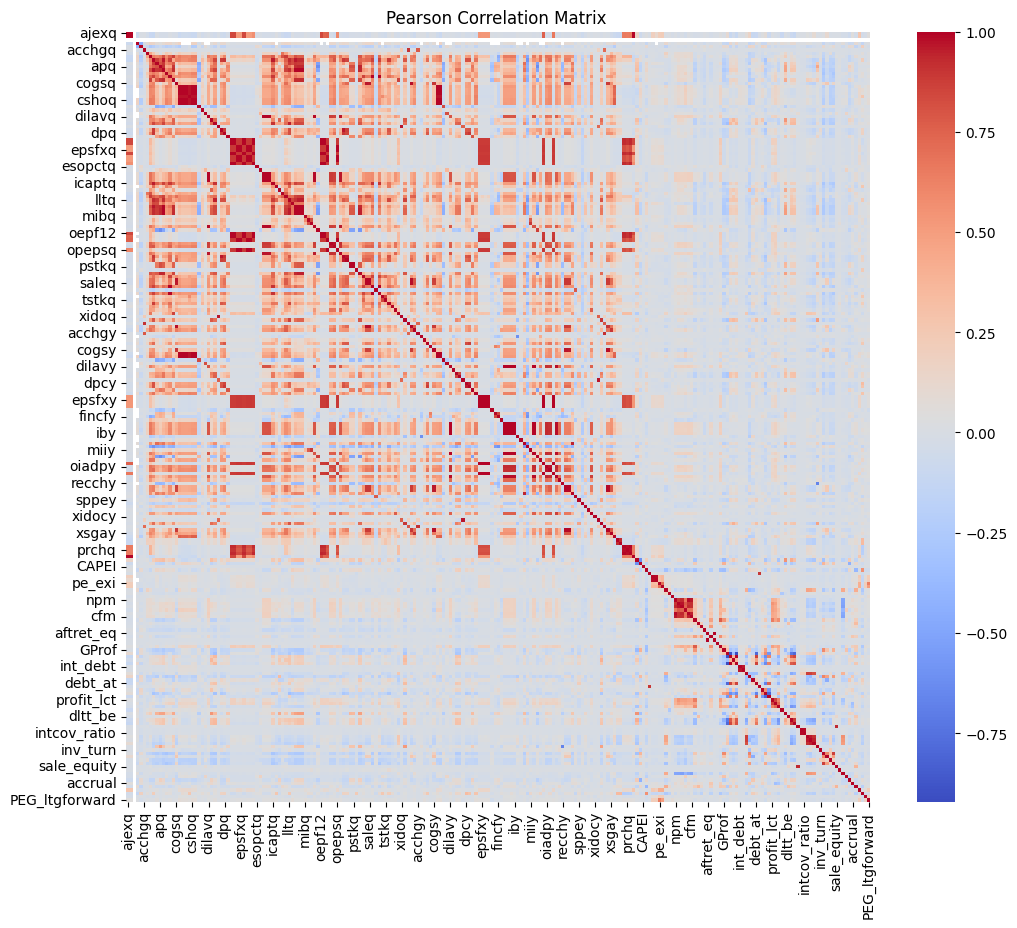

In [191]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Pearson Correlation Matrix ")
plt.show()

In [192]:
# Set a correlation threshold
threshold = 0.8

# Create mask to ignore self-correlations
corr_matrix = df.select_dtypes(include='float').corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with any correlation above the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Highly correlated features to drop:")
print(to_drop)

to_drop.remove('prccq')



Highly correlated features to drop:
['ajpq', 'aoq', 'apq', 'atq', 'ceqq', 'cheq', 'cshfd12', 'cshfdq', 'cshiq', 'cshoq', 'cshprq', 'dlttq', 'dpactq', 'dpq', 'epsf12', 'epsfi12', 'epsfiq', 'epsfxq', 'epspi12', 'epspiq', 'epspxq', 'epsx12', 'ibadjq', 'ibcomq', 'ibq', 'icaptq', 'lcoq', 'lctq', 'lltq', 'loq', 'lseq', 'ltmibq', 'ltq', 'miiq', 'niq', 'oepf12', 'oeps12', 'oepsxq', 'oiadpq', 'oibdpq', 'opepsq', 'piq', 'ppegtq', 'ppentq', 'pstknq', 'pstkq', 'rectq', 'req', 'revtq', 'saleq', 'seqq', 'teqq', 'tstkq', 'txditcq', 'wcapq', 'xidoq', 'xintq', 'xiq', 'xoprq', 'xsgaq', 'cogsy', 'cshfdy', 'cshpry', 'cstkey', 'dilady', 'dilavy', 'dltry', 'dpcy', 'dpy', 'dvpy', 'epsfiy', 'epsfxy', 'epspiy', 'epspxy', 'fincfy', 'ibadjy', 'ibcomy', 'ibcy', 'iby', 'miiy', 'niy', 'nopiy', 'oepsxy', 'oiadpy', 'oibdpy', 'opepsy', 'piy', 'revty', 'saley', 'sivy', 'txty', 'xidoy', 'xinty', 'xiy', 'xopry', 'xsgay', 'dvpsxq', 'prccq', 'prchq', 'prclq', 'adjex', 'pe_op_dil', 'opmbd', 'opmad', 'ptpm', 'cfm', 'aftret_e

In [193]:
df = df.drop(columns=to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Columns: 113 entries, datadate to PEG_ltgforward
dtypes: datetime64[ns](1), float64(111), object(1)
memory usage: 13.2+ MB


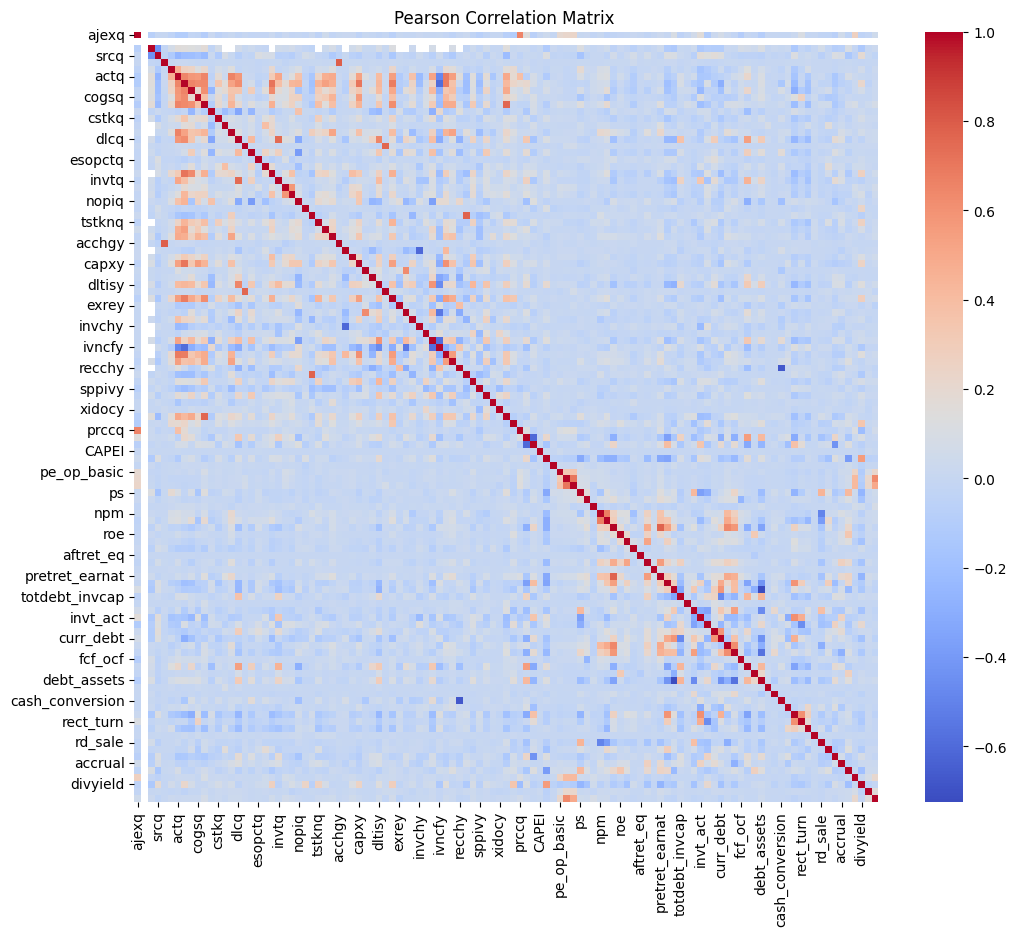

In [194]:
correlation_matrix = df.select_dtypes(include='float').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Pearson Correlation Matrix ")
plt.show()

In [195]:
print(df.columns.tolist())


['datadate', 'tic', 'ajexq', 'currtrq', 'scfq', 'srcq', 'acchgq', 'acoq', 'actq', 'ancq', 'capsq', 'cogsq', 'csh12q', 'cstkeq', 'cstkq', 'diladq', 'dilavq', 'dlcq', 'doq', 'dvpq', 'esopctq', 'esoptq', 'intanq', 'invtq', 'mibq', 'mibtq', 'nopiq', 'pstkrq', 'spiq', 'tstknq', 'txpq', 'txtq', 'acchgy', 'aolochy', 'aqcy', 'capxy', 'chechy', 'dlcchy', 'dltisy', 'doy', 'dvy', 'exrey', 'fiaoy', 'fopoy', 'invchy', 'ivacoy', 'ivchy', 'ivncfy', 'oancfy', 'prstkcy', 'recchy', 'spiy', 'sppey', 'sppivy', 'sstky', 'txdcy', 'xidocy', 'cshtrq', 'dvpspq', 'prccq', 'spcindcd', 'spcseccd', 'CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_exi', 'pe_inc', 'ps', 'pcf', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'roce', 'efftax', 'aftret_eq', 'aftret_invcapx', 'pretret_noa', 'pretret_earnat', 'GProf', 'equity_invcap', 'totdebt_invcap', 'int_debt', 'cash_lt', 'invt_act', 'rect_act', 'short_debt', 'curr_debt', 'profit_lct', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_be', 'debt_assets', 'de_ratio', 'intcov', 'cash_conversion', '

In [196]:
df['prccq'] = df['prccq'] / df['ajexq']
df = df.drop(columns=['ajexq'])

columns_to_keep = [
    'tic', 'datadate', 'prccq', 'ptb', 'bm', 'evm', 'pe_op_basic', 'pe_exi', 'pe_inc', 'ps', 'pcf', 'dpr',
    'divyield', 'PEG_trailing', 'PEG_1yrforward', 'PEG_ltgforward', 'roa', 'roe', 'roce',
    'npm', 'gpm', 'GProf', 'efftax', 'aftret_eq', 'aftret_invcapx', 'pretret_noa',
    'pretret_earnat', 'fcf_ocf', 'cash_debt', 'cash_lt', 'capxy', 'oancfy', 'debt_assets',
    'de_ratio', 'dltt_be', 'int_debt', 'intcov', 'totdebt_invcap', 'short_debt',
    'curr_debt', 'profit_lct', 'at_turn',
    'inv_turn', 'rect_turn', 'pay_turn', 'invt_act', 'rect_act', 'sale_nwc', 'rd_sale',
    'adv_sale', 'staff_sale', 'accrual'
]

df = df[columns_to_keep]


In [197]:
df = df.sort_values(by=['tic','datadate'])

df.tail()

,tic,datadate,prccq,ptb,bm,evm,pe_op_basic,pe_exi,pe_inc,ps,...,inv_turn,rect_turn,pay_turn,invt_act,rect_act,sale_nwc,rd_sale,adv_sale,staff_sale,accrual
15299,ZTS,2022-09-30,148.29,14.605,0.071,28.597,34.561,35.192,35.192,8.965,...,0.974,6.629,6.079,0.315,0.179,1.978,0.066,0.038,0.0,0.016
15300,ZTS,2022-12-31,146.55,17.019,0.067,22.351,36.226,37.194,37.194,9.573,...,0.999,6.886,6.071,0.312,0.162,1.863,0.067,0.036,0.0,0.014
15301,ZTS,2023-03-31,166.44,16.287,0.060,23.885,35.592,36.797,36.797,9.264,...,0.910,6.663,6.490,0.349,0.181,2.037,0.069,0.036,0.0,-0.006
15302,ZTS,2023-06-30,172.21,18.478,0.060,23.067,40.362,40.023,40.023,10.618,...,0.858,6.726,6.293,0.374,0.185,1.969,0.069,0.036,0.0,0.015
15303,ZTS,2023-09-30,173.98,15.485,0.066,23.285,36.055,35.909,35.909,9.647,...,0.830,6.753,6.163,0.395,0.190,1.898,0.070,0.036,0.0,0.006


In [198]:
file_path_3 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/s&p500index.csv' # s&p500
df3 = pd.read_csv(file_path_3)
df3['caldt'] = pd.to_datetime(df3['caldt'])  # Adjust column name if needed

df = df.sort_values(by=['datadate'])


#merge (fill empty cells with nearest s&p500 value)
df = pd.merge_asof(df, df3, left_on='datadate', right_on='caldt', direction='nearest')
df = df.drop(columns=['caldt'])

df = df.sort_values(by=['tic','datadate']).reset_index()
df.tail()

,index,tic,datadate,prccq,ptb,bm,evm,pe_op_basic,pe_exi,pe_inc,...,rect_turn,pay_turn,invt_act,rect_act,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,spindx
15299,14925,ZTS,2022-09-30,148.29,14.605,0.071,28.597,34.561,35.192,35.192,...,6.629,6.079,0.315,0.179,1.978,0.066,0.038,0.0,0.016,3585.62
15300,14977,ZTS,2022-12-31,146.55,17.019,0.067,22.351,36.226,37.194,37.194,...,6.886,6.071,0.312,0.162,1.863,0.067,0.036,0.0,0.014,3839.50
15301,15059,ZTS,2023-03-31,166.44,16.287,0.060,23.885,35.592,36.797,36.797,...,6.663,6.490,0.349,0.181,2.037,0.069,0.036,0.0,-0.006,4109.31
15302,15171,ZTS,2023-06-30,172.21,18.478,0.060,23.067,40.362,40.023,40.023,...,6.726,6.293,0.374,0.185,1.969,0.069,0.036,0.0,0.015,4450.38
15303,15298,ZTS,2023-09-30,173.98,15.485,0.066,23.285,36.055,35.909,35.909,...,6.753,6.163,0.395,0.190,1.898,0.070,0.036,0.0,0.006,4288.05


In [199]:


# convert features to pct

features = [
    'actq', 'ancq', 'epsfxq',
    'lctq', 'ltq', 'revtq',
    'capxy']

ratios = [
    'roa', 'roe','pe_inc', 'divyield',
    'pcf', 'roce',
    'debt_ebitda', 'gpm','evm',
    'cfm', 'npm', 'PEG_trailing',
    'de_ratio', 'curr_ratio', 'ptb']

df[features] = df[features].pct_change()

for col in ratios:
    df[col + '_change'] = df.groupby('tic')[col].pct_change()


df['prccq_change'] = df.groupby('tic')['prccq'].pct_change()
df['next_prccq_change'] = df.groupby('tic')['prccq_change'].shift(-1)

df['spindx_change'] = df.groupby('tic')['spindx'].pct_change()
df['next_spindx_change'] = df.groupby('tic')['spindx_change'].shift(-1)

df['relative_quarterly_return'] = (df['prccq_change'] - df['spindx_change'])

#context returns
#df['relative_quarterly_return_-1'] = df.groupby('tic')['relative_quarterly_return'].shift(1)
#df['relative_quarterly_return_-2'] = df.groupby('tic')['relative_quarterly_return'].shift(2)
#df['relative_quarterly_return_-3'] = df.groupby('tic')['relative_quarterly_return'].shift(3)

df['next_relative_quarterly_return'] = (df['next_prccq_change'] - df['next_spindx_change'])

#df = df.drop(columns=['prccq', 'spindx'])

df.info()

KeyError: "['actq', 'ancq', 'epsfxq', 'lctq', 'ltq', 'revtq'] not in index"

In [ ]:
df = df.sort_values(by=['tic','datadate'])
df.replace(['inf', '-inf', np.inf, -np.inf], np.nan, inplace=True)
df.tail()

,index,gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,...,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward,TICKER,cusip_y,spindx
15299,14925,13721,2022-09-30,2022,3,12,INDL,C,D,STD,...,0.0,0.016,14.605,2.637,0.843,8.705,3.495,ZTS,98978V10,3585.62
15300,14977,13721,2022-12-31,2022,4,12,INDL,C,D,STD,...,0.0,0.014,17.019,2.791,0.898,3.946,3.152,ZTS,98978V10,3839.50
15301,15059,13721,2023-03-31,2023,1,12,INDL,C,D,STD,...,0.0,-0.006,16.287,3.695,0.920,3.453,3.315,ZTS,98978V10,4109.31
15302,15171,13721,2023-06-30,2023,2,12,INDL,C,D,STD,...,0.0,0.015,18.478,3.257,0.787,3.551,3.801,ZTS,98978V10,4450.38
15303,15298,13721,2023-09-30,2023,3,12,INDL,C,D,STD,...,0.0,0.006,15.485,2.875,0.849,3.245,3.436,ZTS,98978V10,4288.05


In [ ]:
# Context

file_path_4 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/context/cay_data.csv' # 
file_path_5 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/context/fama_french_5_factors_plus_momentum.csv' # 
file_path_6 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/context/financial_uncertainty_index.csv' # 
file_path_7 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/context/macro_uncertaintly_index.csv' # 
file_path_8 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/context/q-factors.csv' # 

df4 = pd.read_csv(file_path_4)
df5 = pd.read_csv(file_path_5)
df6 = pd.read_csv(file_path_6)
df7 = pd.read_csv(file_path_7)
df8 = pd.read_csv(file_path_8)


df4['date'] = pd.to_datetime(df4['date'])
df5['dateff'] = pd.to_datetime(df5['dateff'])
df6['date'] = pd.to_datetime(df6['date'])
df7['date'] = pd.to_datetime(df7['date'])
# Convert year and quarter to quarter-end datetime
df8['date'] = pd.to_datetime(df8['year'].astype(str) + 'Q' + df8['quarter'].astype(str)) + pd.offsets.QuarterEnd(0)
df8.drop(['year', 'quarter'], axis=1, inplace=True)
df8['date'] = pd.to_datetime(df8['date'])

df5.rename(columns={'dateff': 'date'}, inplace=True)

# Standardize to month end
for i in [df4, df5, df6, df7]:
    i['date'] = i['date'].dt.to_period('M').dt.to_timestamp('M')

df_context = df4.merge(df5, on='date', how='outer') \
               .merge(df6, on='date', how='outer') \
               .merge(df7, on='date', how='outer') \
               .merge(df8, on='date', how='outer') \
               .sort_values('date').reset_index(drop=True)

df_context = df_context.drop(columns=['c', 'a', 'y', 'cay'])

df_context.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    810 non-null    datetime64[ns]
 1   mktrf   738 non-null    float64       
 2   smb     738 non-null    float64       
 3   hml     738 non-null    float64       
 4   rmw     738 non-null    float64       
 5   cma     738 non-null    float64       
 6   rf      738 non-null    float64       
 7   umd     738 non-null    float64       
 8   h_1_x   714 non-null    float64       
 9   h_3_x   714 non-null    float64       
 10  h_12_x  714 non-null    float64       
 11  h_1_y   714 non-null    float64       
 12  h_3_y   714 non-null    float64       
 13  h_12_y  714 non-null    float64       
 14  r_f     212 non-null    float64       
 15  r_mkt   212 non-null    float64       
 16  r_me    212 non-null    float64       
 17  r_ia    212 non-null    float64       
 18  r_roe   21

/var/folders/2f/bmcm36r135v_v27k0vz0w_dr0000gn/T/ipykernel_47964/3212252724.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df8['date'] = pd.to_datetime(df8['year'].astype(str) + 'Q' + df8['quarter'].astype(str)) + pd.offsets.QuarterEnd(0)


In [ ]:
#df_context.to_csv('context.csv', index=False)

In [ ]:
# Replace inf and -inf with NaN
df_context.replace(['inf', '-inf', np.inf, -np.inf], np.nan, inplace=True)

df_context = df_context.dropna()
df_context.head()

,date,mktrf,smb,hml,rmw,cma,rf,umd,h_1_x,h_3_x,h_12_x,h_1_y,h_3_y,h_12_y,r_f,r_mkt,r_me,r_ia,r_roe,r_eg
116,1967-03-31,0.0399,0.0187,0.0037,0.0086,-0.0160,0.0039,0.0153,0.918090,0.952662,0.982072,0.616383,0.739871,0.865610,1.1406,13.3616,11.4466,-5.3001,8.4933,-1.1459
119,1967-06-30,0.0241,0.0643,0.0085,-0.0062,-0.0242,0.0027,0.0600,0.895576,0.934862,0.976690,0.614591,0.741683,0.869119,0.9172,1.8431,8.7787,-2.4629,2.0749,-2.4294
122,1967-09-30,0.0311,0.0244,-0.0250,0.0020,-0.0095,0.0032,0.0252,0.871980,0.918416,0.973204,0.627504,0.754038,0.878176,0.9601,6.8744,5.3219,3.9620,-0.7878,-0.7295
125,1967-12-31,0.0305,0.0575,-0.0053,-0.0081,0.0013,0.0033,0.0325,0.896381,0.937069,0.979059,0.655009,0.777824,0.890536,1.0668,0.2618,5.3799,-5.0151,5.1894,1.8397
128,1968-03-31,0.0020,-0.0159,-0.0059,0.0105,-0.0110,0.0038,0.0323,0.934794,0.966593,0.988554,0.627678,0.755234,0.877596,1.1806,-7.5774,1.5096,6.1718,-1.4313,5.5496


In [ ]:
file_path_9 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/RATIOS_INDUSTRY_ALL.csv' # Fundamental data
df9 = pd.read_csv(file_path_9)
df9.rename(columns={'public_date': 'date'}, inplace=True)
df9['date'] = pd.to_datetime(df9['date'])

selected_columns = [
    'date', 'indret_ew', 'CAPEI_Median',
    'bm_Median', 'evm_Median', 'pe_op_basic_Median', 'pe_inc_Median', 'ptb_Median', 
    'PEG_trailing_Median', 'divyield_Median', 'roa_Median', 'roce_Median', 'roe_Median', 
    'gpm_Median', 'npm_Median', 'opmad_Median', 'de_ratio_Median', 'debt_ebitda_Median', 
    'debt_assets_Median', 'intcov_ratio_Median', 'cash_ratio_Median', 'curr_ratio_Median', 
    'quick_ratio_Median', 'at_turn_Median', 'inv_turn_Median', 'rect_turn_Median', 'FFI10_desc'
]

df9 = df9[selected_columns]

df9 = df9.dropna(axis=1)

df_context = df_context.merge(df9, on='date', how='inner')

df_context.tail(25)


,date,mktrf,smb,hml,rmw,cma,rf,umd,h_1_x,h_3_x,...,debt_ebitda_Median,debt_assets_Median,intcov_ratio_Median,cash_ratio_Median,curr_ratio_Median,quick_ratio_Median,at_turn_Median,inv_turn_Median,rect_turn_Median,FFI10_desc
1975,2019-06-30,0.0693,0.0037,-0.0070,0.0090,-0.0044,0.0018,-0.0225,1.003838,1.019318,...,2.220,0.537,5.329,0.276,1.842,1.143,1.036,4.347,8.945,NODUR
1976,2019-06-30,0.0693,0.0037,-0.0070,0.0090,-0.0044,0.0018,-0.0225,1.003838,1.019318,...,2.606,0.793,3.834,0.476,1.505,1.340,0.207,5.974,1.781,OTHER
1977,2019-06-30,0.0693,0.0037,-0.0070,0.0090,-0.0044,0.0018,-0.0225,1.003838,1.019318,...,2.405,0.624,4.296,0.172,1.574,0.792,1.728,5.601,26.354,SHOPS
1978,2019-06-30,0.0693,0.0037,-0.0070,0.0090,-0.0044,0.0018,-0.0225,1.003838,1.019318,...,3.422,0.676,2.036,0.422,1.438,1.249,0.461,15.667,6.451,TELCM
1979,2019-06-30,0.0693,0.0037,-0.0070,0.0090,-0.0044,0.0018,-0.0225,1.003838,1.019318,...,4.344,0.685,2.939,0.063,0.675,0.536,0.236,15.419,8.442,UTILS
1980,2019-09-30,0.0143,0.0026,0.0677,0.0184,0.0339,0.0018,-0.0683,0.896348,0.937583,...,1.617,0.579,4.362,0.334,1.960,1.219,1.113,5.194,5.778,DURBL
1981,2019-09-30,0.0143,0.0026,0.0677,0.0184,0.0339,0.0018,-0.0683,0.896348,0.937583,...,1.721,0.491,2.859,0.257,1.255,0.978,0.414,17.196,6.627,ENRGY
1982,2019-09-30,0.0143,0.0026,0.0677,0.0184,0.0339,0.0018,-0.0683,0.896348,0.937583,...,0.617,0.498,2.331,0.869,1.909,1.633,0.680,4.439,5.574,HITEC
1983,2019-09-30,0.0143,0.0026,0.0677,0.0184,0.0339,0.0018,-0.0683,0.896348,0.937583,...,-0.043,0.348,-10.168,3.729,4.469,4.207,0.352,2.899,5.816,HLTH
1984,2019-09-30,0.0143,0.0026,0.0677,0.0184,0.0339,0.0018,-0.0683,0.896348,0.937583,...,2.121,0.574,5.218,0.316,2.104,1.247,0.873,4.059,6.254,MANUF


In [ ]:
df = df.sort_values(by=['datadate'])

# Corrected industry mapping
ticker_to_industry = {
    # Durable Goods (DURBL)
    'TSLA': 'DURBL', 'F': 'DURBL',

    # Energy (ENRGY)
    'XOM': 'ENRGY', 'CVX': 'ENRGY', 'COP': 'ENRGY', 'OXY': 'ENRGY',

    # High-Tech (HITEC)
    'AAPL': 'HITEC', 'MSFT': 'HITEC', 'GOOGL': 'HITEC', 'AMZN': 'HITEC', 'META': 'HITEC',
    'NVDA': 'HITEC', 'INTC': 'HITEC', 'CSCO': 'HITEC', 'QCOM': 'HITEC', 'ADBE': 'HITEC', 
    'PYPL': 'HITEC', 'NFLX': 'HITEC', 'MU': 'HITEC', 'WDC': 'HITEC', 'CTSH': 'HITEC', 'EXPE': 'HITEC',

    # Healthcare (HLTH)
    'JNJ': 'HLTH', 'PFE': 'HLTH', 'MRK': 'HLTH', 'ABT': 'HLTH', 'LLY': 'HLTH', 
    'BMY': 'HLTH', 'MDT': 'HLTH', 'HCA': 'HLTH', 'ZTS': 'HLTH', 'AMGN': 'HLTH', 'REGN': 'HLTH',

    # Manufacturing (MANUF)
    'BA': 'MANUF', 'RTX': 'MANUF', 'LMT': 'MANUF', 'GE': 'MANUF', 'CAT': 'MANUF', 
    'MMM': 'MANUF', 'ETN': 'MANUF', 'JCI': 'MANUF', 'NOC': 'MANUF', 'TMO': 'MANUF',

    # Non-Durable Goods (NODUR) - (Moved NKE here)
    'PG': 'NODUR', 'KO': 'NODUR', 'CL': 'NODUR', 'WBA': 'NODUR', 'CVS': 'NODUR', 
    'PPL': 'NODUR', 'TGT': 'NODUR', 'STZ': 'NODUR', 'NKE': 'NODUR',

    # Other (OTHER)
    'BRK.B': 'OTHER', 'JPM': 'OTHER', 'GS': 'OTHER', 'WFC': 'OTHER', 'SPGI': 'OTHER',
    'SCHW': 'OTHER', 'MMC': 'OTHER', 'AIG': 'OTHER', 'AON': 'OTHER', 'PGR': 'OTHER', 
    'CME': 'OTHER', 'RJF': 'OTHER', 'ADM': 'OTHER', 'APD': 'OTHER', 'EQIX': 'OTHER',

    # Shops (SHOPS)
    'WMT': 'SHOPS', 'MCD': 'SHOPS', 'SBUX': 'SHOPS', 'TGT': 'SHOPS', 'COST': 'SHOPS', 
    'DIS': 'SHOPS', 'TSN': 'SHOPS',

    # Telecom (TELCM)
    'T': 'TELCM', 'VZ': 'TELCM',

    # Utilities (UTILS)
    'EXC': 'UTILS', 'ECL': 'UTILS',
}

# Add industry column to DataFrame
df['FFI10_desc'] = df['tic'].map(ticker_to_industry)

# Assign 'OTHER' to any tickers not in the dictionary
df['FFI10_desc'] = df['FFI10_desc'].fillna('OTHER')

df_context.rename(columns={'date': 'datadate'}, inplace=True)

df = pd.merge(df, df_context, on=['datadate', 'FFI10_desc'], how='inner')

df = df.sort_values(by=['tic','datadate'])

df.tail(30)

,index,gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,...,de_ratio_Median,debt_ebitda_Median,debt_assets_Median,intcov_ratio_Median,cash_ratio_Median,curr_ratio_Median,quick_ratio_Median,at_turn_Median,inv_turn_Median,rect_turn_Median
11749,13945,4503,2019-12-31,2019,4,12,INDL,C,D,STD,...,0.913,1.743,0.487,1.897,0.262,1.282,1.026,0.419,16.481,6.825
9722,11546,13721,2012-12-31,2012,4,12,INDL,C,D,STD,...,0.508,0.000,0.366,-0.553,2.220,3.450,3.136,0.615,3.096,6.441
9803,11641,13721,2013-03-31,2013,1,12,INDL,C,D,STD,...,0.502,0.000,0.373,0.737,2.225,3.458,3.022,0.602,2.994,6.400
9832,11684,13721,2013-06-30,2013,2,12,INDL,C,D,STD,...,0.550,0.000,0.385,-1.096,2.254,3.611,3.167,0.579,3.093,6.410
9930,11796,13721,2013-09-30,2013,3,12,INDL,C,D,STD,...,0.486,0.000,0.385,-1.803,2.368,3.593,3.131,0.568,3.042,6.269
9981,11861,13721,2013-12-31,2013,4,12,INDL,C,D,STD,...,0.480,0.000,0.382,-2.992,2.279,3.657,3.163,0.543,3.140,6.403
10066,11960,13721,2014-03-31,2014,1,12,INDL,C,D,STD,...,0.419,0.000,0.344,-3.258,2.569,3.893,3.406,0.525,2.848,6.436
10168,12076,13721,2014-06-30,2014,2,12,INDL,C,D,STD,...,0.400,0.000,0.340,-5.046,2.841,4.039,3.660,0.498,3.026,6.329
10267,12189,13721,2014-09-30,2014,3,12,INDL,C,D,STD,...,0.404,0.000,0.332,-5.341,2.953,4.212,3.699,0.502,2.967,6.420
10341,12277,13721,2014-12-31,2014,4,12,INDL,C,D,STD,...,0.392,0.000,0.323,-5.487,3.085,4.378,3.904,0.502,2.961,6.324


In [ ]:
#df.to_csv('dati_with_context.csv', index=False)  # Set index=False to exclude the index column